In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

In [40]:
df = pd.read_csv('../data/colors.csv')
df

,input_color,output_color
0,#502F4C,#70587C
1,#C8B8DB,#F9F4F5
2,#785964,#454545
3,#F1FFFA,#D5C7BC
4,#93B7BE,#F1FFFA
...,...,...
498,#0022FF,#E3B505
499,#DAA89B,#AE847E
500,#AE847E,#2C0E37
501,#2C0E37,#690375


Проверка на пропуски

In [41]:
df.isna().sum()

input_color     0
output_color    0
dtype: int64

In [42]:
def hex_to_rgb(hex):
  if hex[0] == '#':
    hex = hex[1:]

  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal)
  
  return tuple(rgb)

In [43]:
for row in df.columns:
    df[row] = df[row].apply(hex_to_rgb)

df

,input_color,output_color
0,"(80, 47, 76)","(112, 88, 124)"
1,"(200, 184, 219)","(249, 244, 245)"
2,"(120, 89, 100)","(69, 69, 69)"
3,"(241, 255, 250)","(213, 199, 188)"
4,"(147, 183, 190)","(241, 255, 250)"
...,...,...
498,"(0, 34, 255)","(227, 181, 5)"
499,"(218, 168, 155)","(174, 132, 126)"
500,"(174, 132, 126)","(44, 14, 55)"
501,"(44, 14, 55)","(105, 3, 117)"


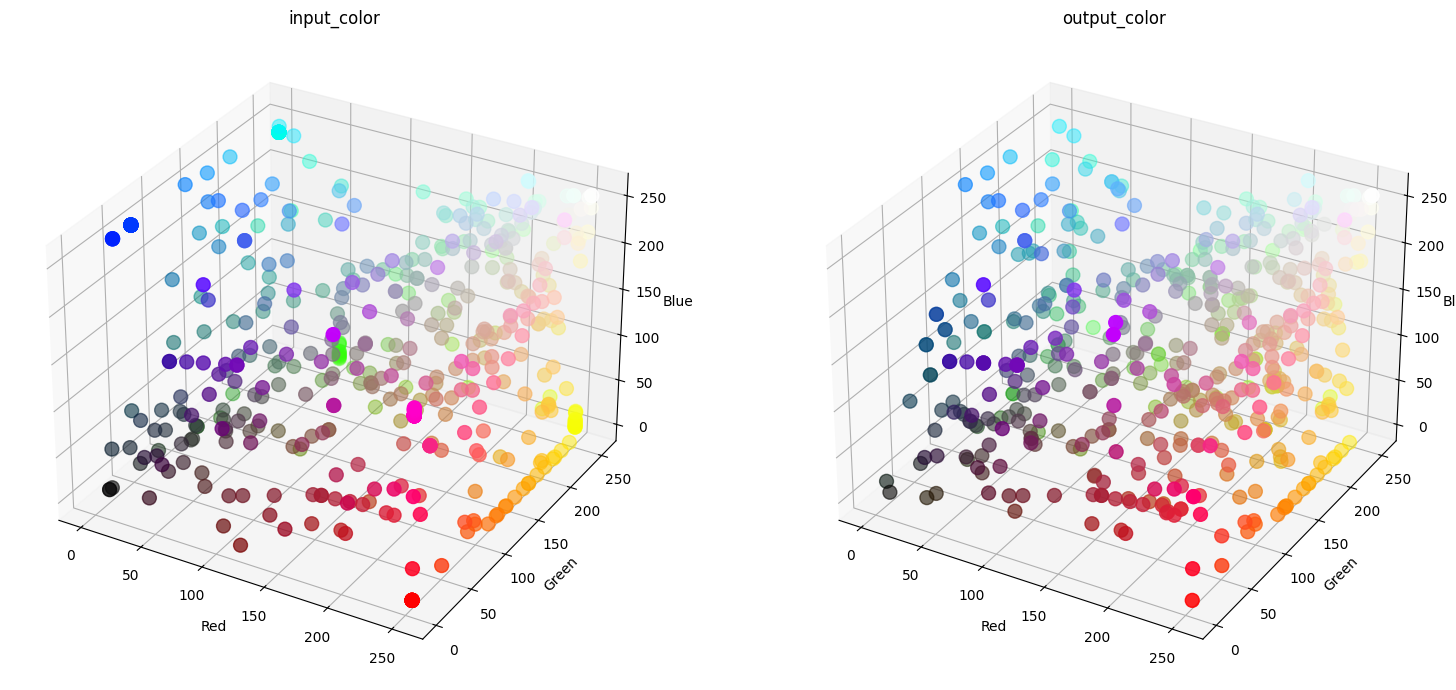

In [44]:
def visualize_rgb_3d(df: pd.DataFrame, col1: str, col2: str):
    fig = plt.figure(figsize=(16, 7))

    for i, col_name in enumerate([col1, col2], start=1):
        rgb_norm = df[col_name].apply(lambda x: (x[0]/255, x[1]/255, x[2]/255))
        xs = df[col_name].apply(lambda x: x[0])
        ys = df[col_name].apply(lambda x: x[1])
        zs = df[col_name].apply(lambda x: x[2])

        ax = fig.add_subplot(1, 2, i, projection='3d')
        ax.scatter(xs, ys, zs, c=rgb_norm.tolist(), s=100)
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')
        ax.set_title(f'{col_name}')

    plt.tight_layout()
    plt.show()

visualize_rgb_3d(df, 'input_color', 'output_color')


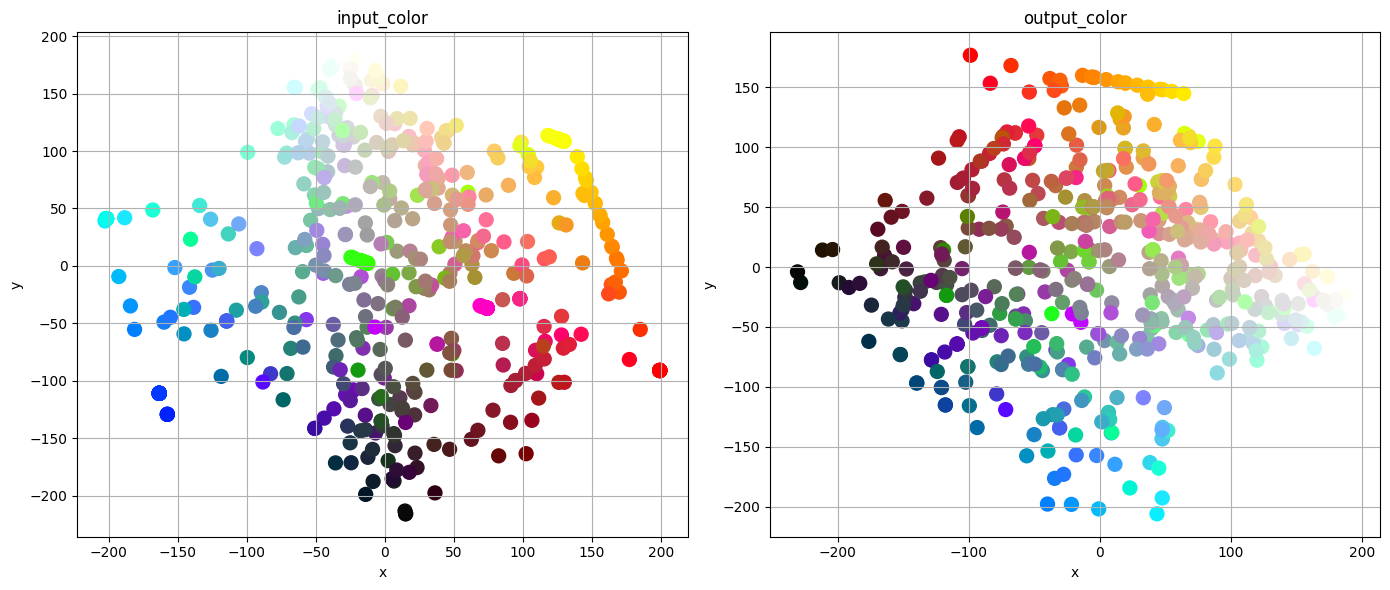

In [45]:
def visualize_rgb_2d(df: pd.DataFrame, col1: str, col2: str):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    for ax, col_name in zip(axes, [col1, col2]):
        colors = np.array(df[col_name].tolist())
        pca = PCA(n_components=2)
        components = pca.fit_transform(colors)
        colors_norm = colors / 255

        ax.scatter(components[:, 0], components[:, 1], c=colors_norm, s=100)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'{col_name}')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

visualize_rgb_2d(df, 'input_color', 'output_color')


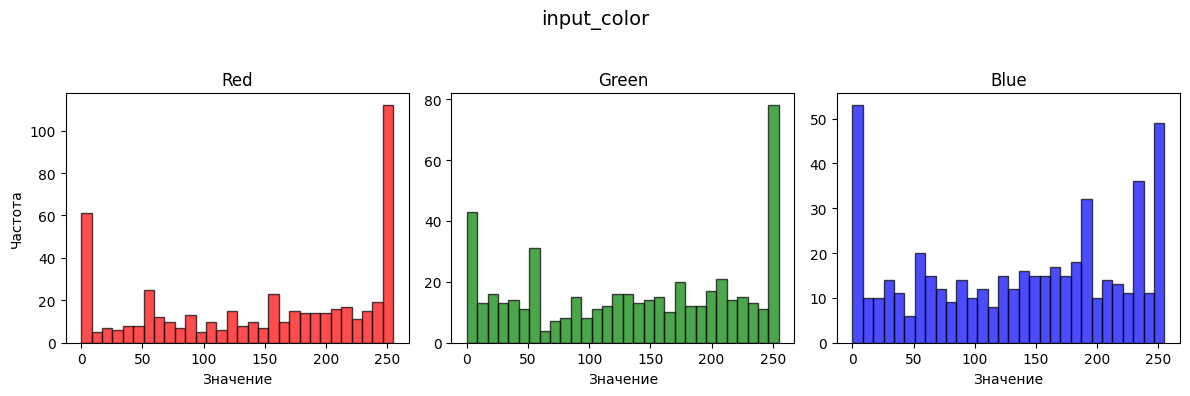

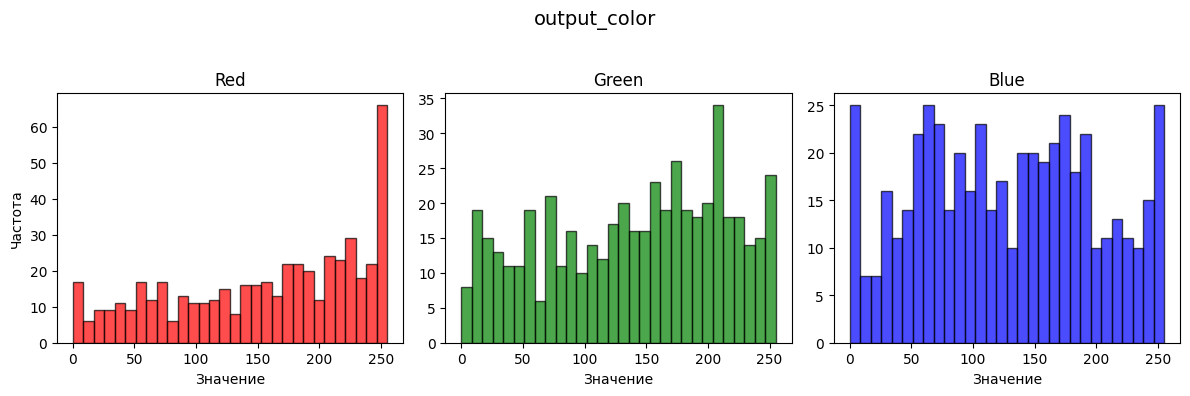

In [46]:
def plot_rgb_histograms(df, col_name):
    colors = df[col_name].tolist()
    r = [c[0] for c in colors]
    g = [c[1] for c in colors]
    b = [c[2] for c in colors]

    plt.figure(figsize=(12, 4))
    plt.suptitle(f'{col_name}', fontsize=14)

    plt.subplot(1, 3, 1)
    plt.hist(r, bins=30, color='red', alpha=0.7, ec='k')
    plt.title('Red')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    plt.subplot(1, 3, 2)
    plt.hist(g, bins=30, color='green', alpha=0.7, ec='k')
    plt.title('Green')
    plt.xlabel('Значение')

    plt.subplot(1, 3, 3)
    plt.hist(b, bins=30, color='blue', alpha=0.7, ec='k')
    plt.title('Blue')
    plt.xlabel('Значение')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_rgb_histograms(df, 'input_color')
plot_rgb_histograms(df, 'output_color')


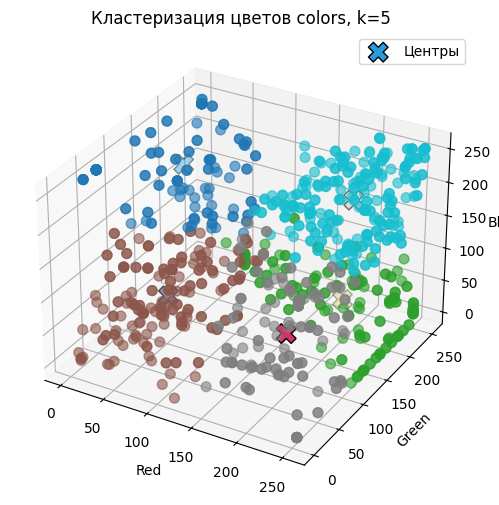

In [54]:
from sklearn.cluster import KMeans

def kmeans_cluster_and_plot(df, col_name, n_clusters=3):
    colors = np.array(df[col_name].tolist())

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(colors)
    centers = kmeans.cluster_centers_

    colors_norm = colors / 255
    centers_norm = centers / 255

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(colors[:, 0], colors[:, 1], colors[:, 2], c=labels, cmap='tab10', s=50, alpha=0.6)

    ax.scatter(
        centers[:, 0], centers[:, 1], centers[:, 2], 
        c=centers_norm, s=200, marker='X', edgecolors='k', 
        label='Центры'
        )

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title(f'Кластеризация цветов {col_name}, k={n_clusters}')
    ax.legend()
    plt.show()

df_comb = pd.concat([df['input_color'], df['output_color']], axis=0).reset_index(drop=True)
df_comb = pd.DataFrame({'colors': df_comb})
df_comb.drop_duplicates()


kmeans_cluster_and_plot(df_comb, 'colors', n_clusters=5)


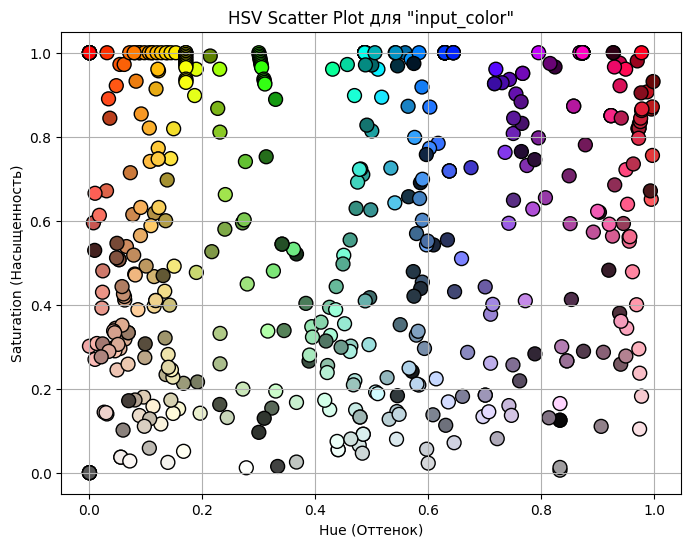

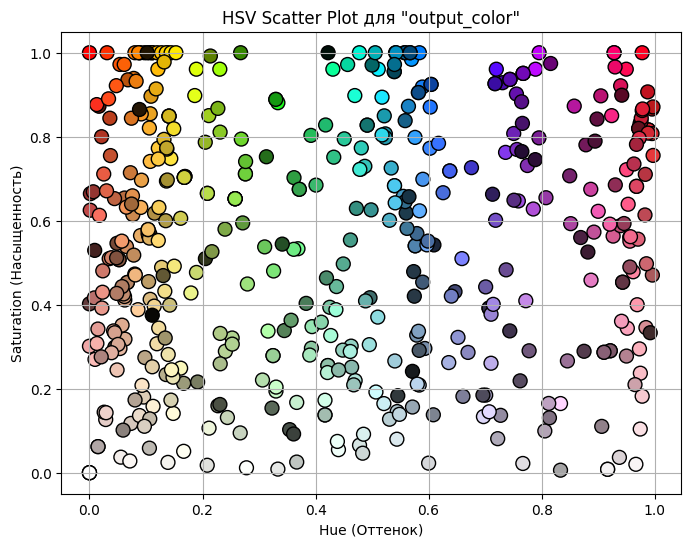

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

def plot_hsv_scatter(df, col_name):
    rgb = np.array(df[col_name].tolist()) / 255.0
    hsv = rgb_to_hsv(rgb)

    h = hsv[:, 0] 
    s = hsv[:, 1]
    colors = rgb
    
    plt.figure(figsize=(8, 6))
    plt.scatter(h, s, c=colors, s=100, edgecolor='k')
    plt.xlabel('Hue (Оттенок)')
    plt.ylabel('Saturation (Насыщенность)')
    plt.title(f'HSV Scatter Plot для "{col_name}"')
    plt.grid(True)
    plt.show()

plot_hsv_scatter(df, 'input_color')
plot_hsv_scatter(df, 'output_color')
